In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: xlabel='airline_sentiment', ylabel='count'>

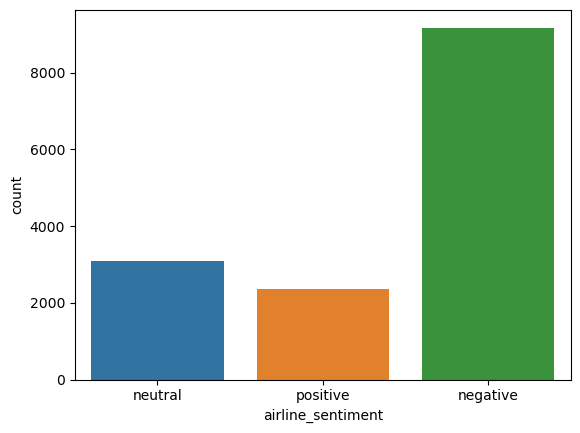

In [43]:
sns.countplot(data=df,x='airline_sentiment')

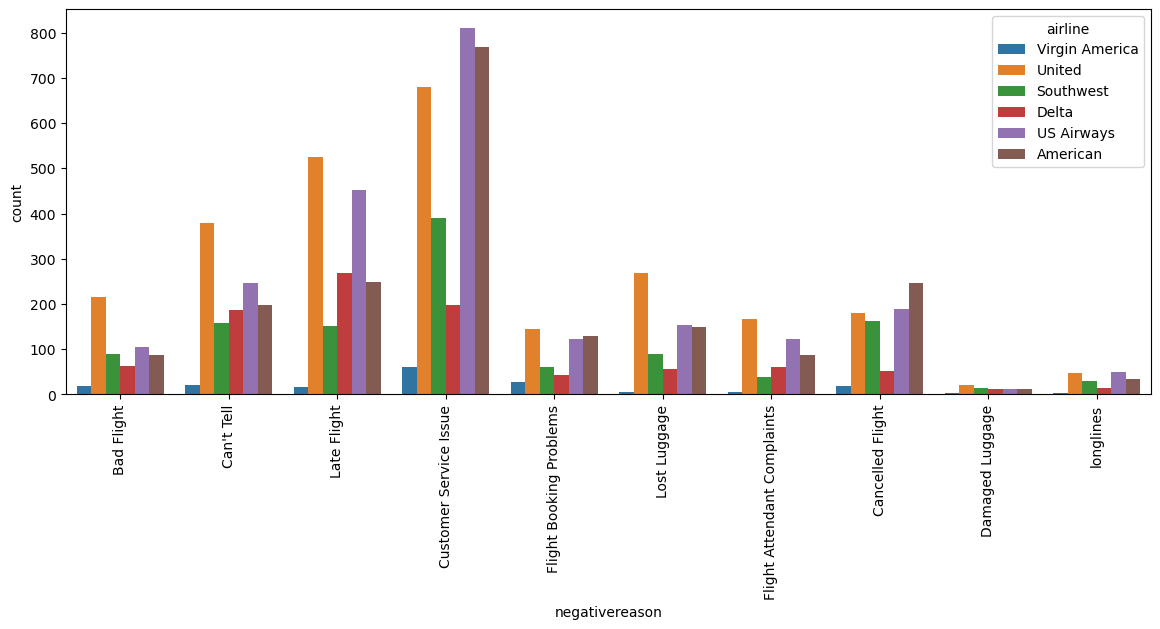

In [44]:
plt.figure(figsize=(14,5))
sns.countplot(data=df,x = 'negativereason', hue = 'airline')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='airline', ylabel='count'>

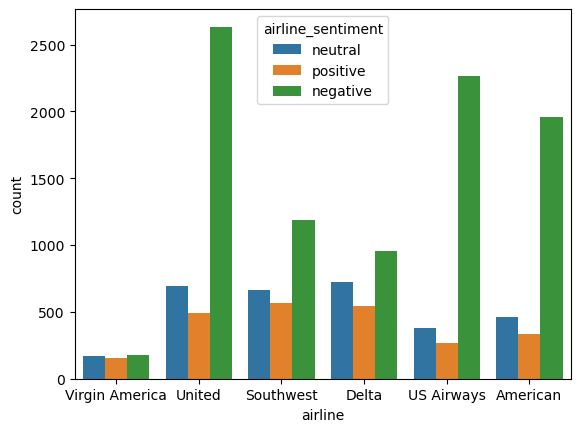

In [45]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

In [46]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

#### Features and Label

In [47]:
data = df[['airline_sentiment','text']]

In [48]:
y = df['airline_sentiment']
X=df['text']

In [68]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

#### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
df.shape

(14640, 15)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=51)

### Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [54]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Model Comparisons 

In [55]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [57]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

### Performance Evaluation

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [60]:
def report(mod):
    print('Model is : ', mod)
    y_pred = mod.predict(X_test_tfidf)
    print(classification_report(y_pred,y_test))
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

Model is :  MultinomialNB()
              precision    recall  f1-score   support

    negative       0.99      0.65      0.79      2729
     neutral       0.12      0.74      0.21       109
    positive       0.16      0.86      0.27        90

    accuracy                           0.66      2928
   macro avg       0.43      0.75      0.42      2928
weighted avg       0.94      0.66      0.75      2928



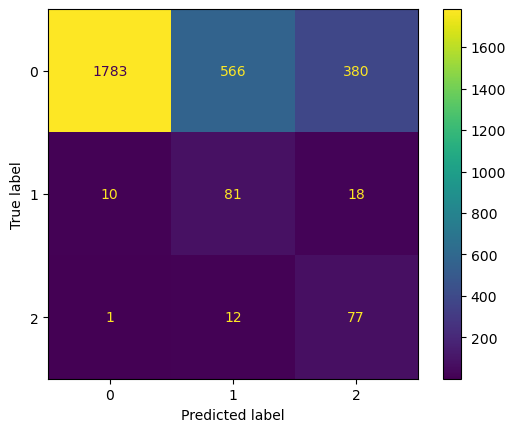

In [61]:
report(nb)

Model is :  LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

    negative       0.93      0.79      0.86      2110
     neutral       0.45      0.67      0.54       443
    positive       0.62      0.78      0.69       375

    accuracy                           0.77      2928
   macro avg       0.67      0.75      0.69      2928
weighted avg       0.82      0.77      0.79      2928



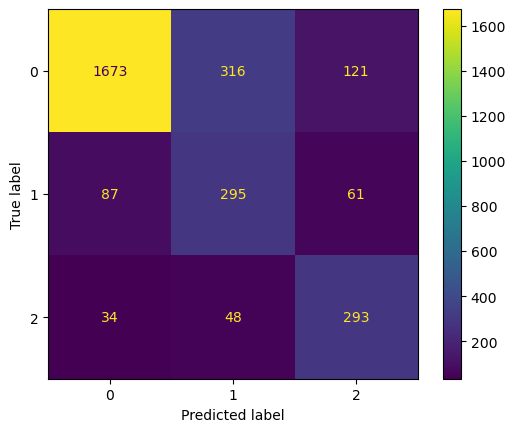

In [62]:
report(log)

Model is :  LinearSVC()
              precision    recall  f1-score   support

    negative       0.90      0.83      0.86      1941
     neutral       0.49      0.63      0.55       520
    positive       0.70      0.71      0.71       467

    accuracy                           0.78      2928
   macro avg       0.70      0.72      0.71      2928
weighted avg       0.80      0.78      0.78      2928



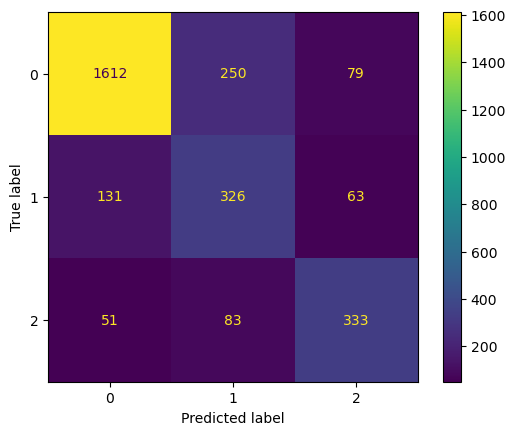

In [63]:
report(svc)

Model is :  RandomForestClassifier()
              precision    recall  f1-score   support

    negative       0.93      0.77      0.84      2173
     neutral       0.38      0.65      0.48       384
    positive       0.56      0.72      0.63       371

    accuracy                           0.75      2928
   macro avg       0.62      0.71      0.65      2928
weighted avg       0.81      0.75      0.77      2928



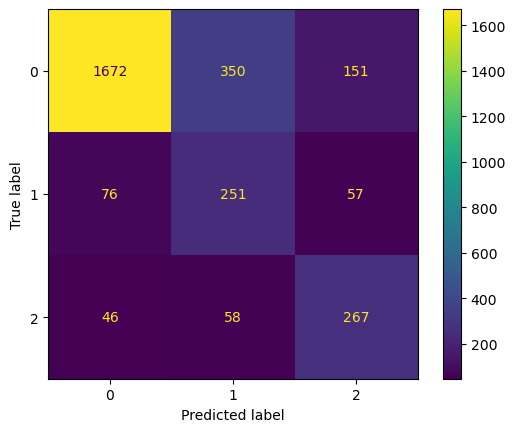

In [64]:
report(rfc)

#### Pipeline

In [65]:
from sklearn.pipeline import Pipeline

In [67]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df['text'],df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [69]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [70]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [76]:
new_tweet = ['bad flight','good flight','Airline was not one of the worst I have seen']
pipe.predict(new_tweet)

array(['negative', 'positive', 'negative'], dtype=object)